# About Dataset 
- Gender : refers to the biological sex of the individual, which can have an impact on their susceptibility to diabetes.

- Age : is an important factor as diabetes is more commonly diagnosed in older adults.Age ranges from 0-80 in our dataset.

- Hypertension : is a medical condition in which the blood pressure in the arteries is persistently elevated. It has values a 0.

- Heart disease is another medical condition that is associated with an increased risk of developing diabetes. 

- Smoking history : is also considered a risk factor for diabetes and can exacerbate the complications associated.

- BMI (Body Mass Index) : is a measure of body fat based on weight and height. Higher BMI values are linked to a higher risk.

- HbA1c (Hemoglobin A1c) level : is a measure of a person's average blood sugar level over the past 2-3 months. Higher levels. 

- Blood glucose level refers to the amount of glucose in the bloodstream at a given time. High blood glucose levels are a key.

- Diabetes : is the target variable being predicted, with values of 1 indicating the presence of diabetes and 0 indicating the.





# Importing Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import defaultdict
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import RandomizedSearchCV
import joblib

## Problem Defintion

The diabetes_prediction_dataset.csv file contains medical and demographic data of patients along with their diabetes status, whether positive or negative. It consists of various features such as age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c level, and blood glucose level. The Dataset can be utilized to construct machine learning models that can predict the likelihood of diabetes in patients based on their medical history and demographic details.


In [2]:
df = pd.read_csv(r'/kaggle/input/diabetes-prediction-dataset/diabetes_prediction_dataset.csv')

In [3]:
df.head(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
# Shape Of The Dataset
df.shape

(100000, 9)

In [5]:
# let’s see if there are null valuecs
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [6]:
# some info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


- As we can see the string data in the dataframe is in the form of object, we need to convert it back to string to work on it

In [7]:
# convert object data to string 
string_col = df.select_dtypes(include='object').columns
df[string_col]=df[string_col].astype('string')

In [8]:
df.dtypes

gender                 string[python]
age                           float64
hypertension                    int64
heart_disease                   int64
smoking_history        string[python]
bmi                           float64
HbA1c_level                   float64
blood_glucose_level             int64
diabetes                        int64
dtype: object

- So, as we can see here the object data has been converted to string

In [9]:
df['gender'].value_counts()

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: Int64

In [10]:
df['smoking_history'].value_counts()

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: Int64

In [11]:
df[df['gender']== 'Other'] 

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
12669,Other,10.0,0,0,not current,14.09,5.0,140,0
14838,Other,19.0,0,0,No Info,27.32,5.7,158,0
16702,Other,39.0,0,0,not current,31.24,6.2,85,0
18691,Other,10.0,0,0,not current,16.59,6.1,160,0
23266,Other,23.0,0,0,No Info,24.23,6.1,140,0
31985,Other,53.0,0,0,No Info,27.32,6.6,160,0
33805,Other,45.0,0,0,never,27.32,4.0,159,0
34929,Other,47.0,0,0,never,36.76,6.6,90,0
35006,Other,47.0,0,0,never,36.76,3.5,200,0
40337,Other,18.0,0,0,not current,30.19,6.1,90,0


- Remove Unnecessary value (Other)...I think this value is not important and did not affect the data

In [12]:
df = df[df['gender'] != 'Other']

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,99982.0,41.888076,22.517206,0.08,24.00,43.00,60.00,80.00
hypertension,99982.0,0.074863,0.263172,0.00,0.00,0.00,0.00,1.00
heart_disease,99982.0,0.039427,0.194610,0.00,0.00,0.00,0.00,1.00
bmi,99982.0,27.320757,6.636853,10.01,23.63,27.32,29.58,95.69
HbA1c_level,99982.0,5.527529,1.070665,3.50,4.80,5.80,6.20,9.00
blood_glucose_level,99982.0,138.057810,40.709469,80.00,100.00,140.00,159.00,300.00
diabetes,99982.0,0.085015,0.278906,0.00,0.00,0.00,0.00,1.00


- The describe() function in pandas is very handy in getting various summary statistics.This function returns the count, mean, standard deviation, minimum and maximum values and the quantiles of the data.

In [14]:
# let’s see if there are duplicated values
df.duplicated().sum()

3854

In [15]:
# remove duplicates
df= df.drop_duplicates()

In [16]:
df.duplicated().sum()

0

# Exploratory Data Analysis (EDA) 

# Univariate Analysis


In [17]:
# Getting the categorical columns
string_col=df.select_dtypes("string").columns.to_list()

In [18]:
string_col

['gender', 'smoking_history']

In [19]:
# Getting the numerical columns
num_col=df.columns.to_list()
#print(num_col)
for col in string_col:
    num_col.remove(col)
num_col.remove("diabetes")

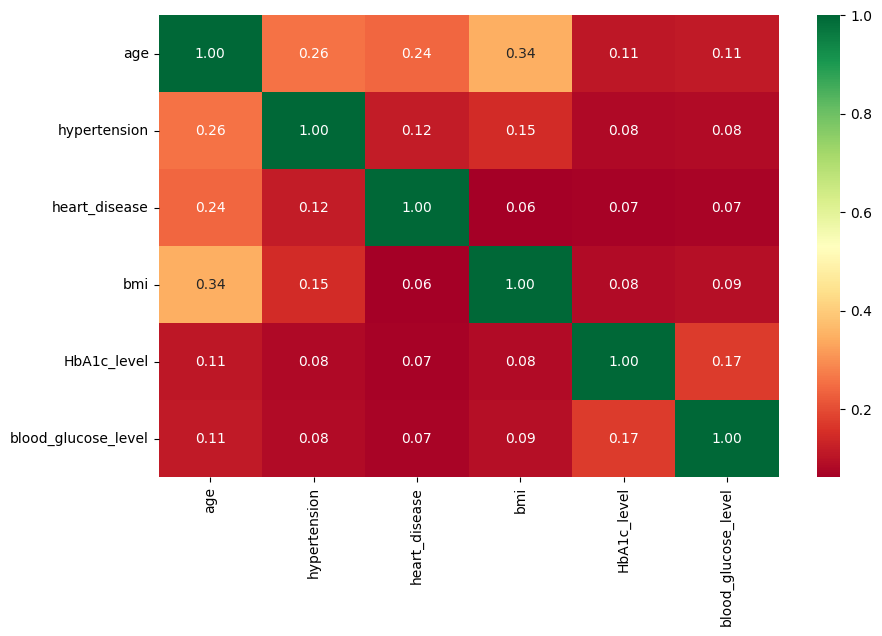

In [20]:
# Correlation numerical features
df_corr = df[num_col].corr()

f , ax = plt.subplots(figsize= (10,6))

sns.heatmap(df_corr, annot=True,fmt= '.2f' , cmap = 'RdYlGn',annot_kws={'size': 10} , ax=ax)

plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


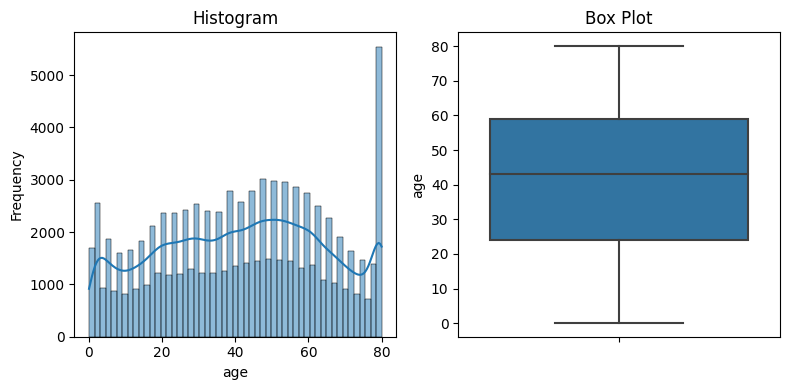

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


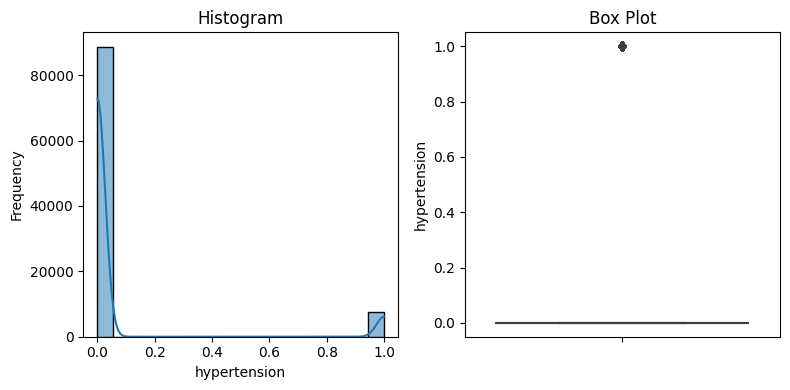

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


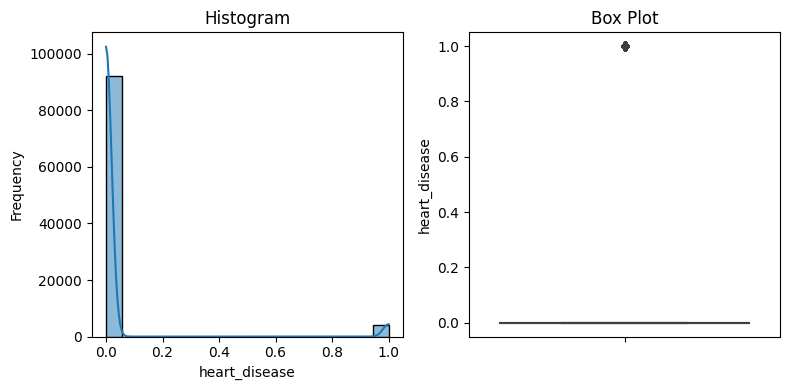

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


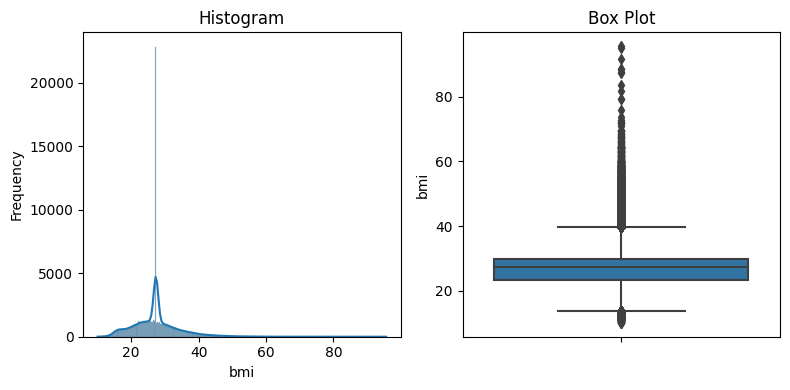

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


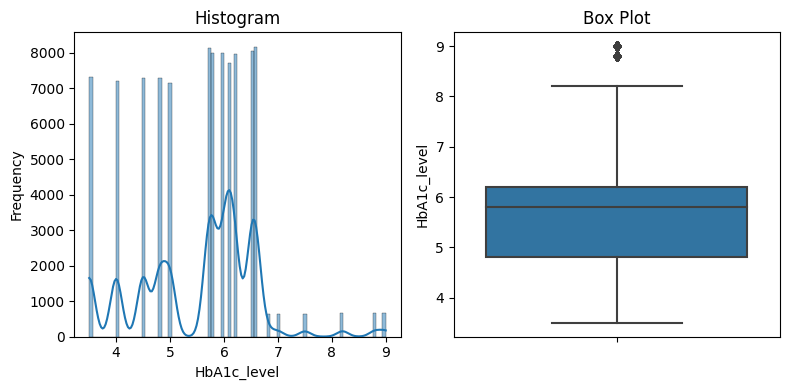

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


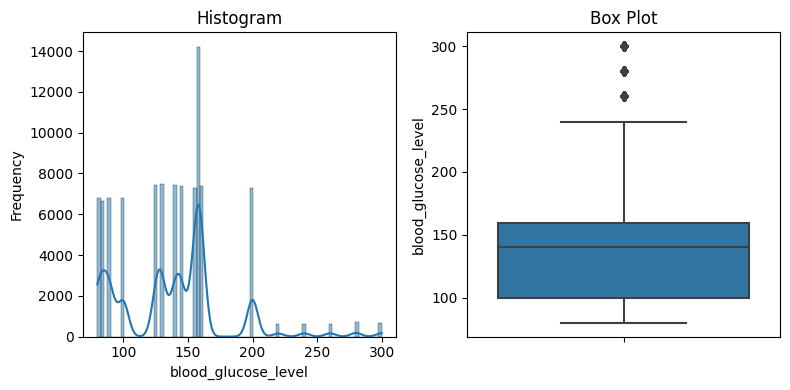

In [21]:
# Perform univariate analysis for each variable
for variable in num_col:
        
    plt.figure(figsize=(8, 4))
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data=df, x=variable, kde=True)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("Histogram")
    
    # Box plot
    plt.subplot(1, 2, 2)
    sns.boxplot(data=df, y=variable)
    plt.ylabel(variable)
    plt.title("Box Plot")
    
    # Adjust spacing between subplots
    plt.tight_layout()
    
    # Show the plots
    plt.show()

- there are outliers in bmi ,HbA1c_level and blood_glucose_level

# Dealing with Outliers


In [22]:

def Outliers(df, feature):
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    
    iqr = q3 - q1

    lower = q1 - 1.5 * iqr

    upper = q3 + 1.5 * iqr
    
    df_clean = df[(df[feature] >= lower) & (df[feature] <= upper)]
    return df_clean  # Return the cleaned data

In [23]:
#there are outliers in bmi ,HbA1c_level and blood_glucose_level
df_clean = Outliers(df, 'bmi')
df_clean = Outliers(df, 'HbA1c_level')
df_clean = Outliers(df, 'blood_glucose_level')


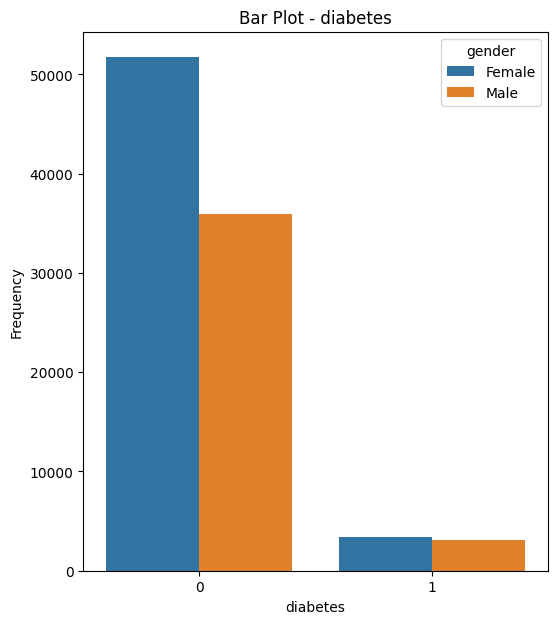

In [24]:
# Perform univariate analysis for diabetes
plt.figure(figsize=(6, 7))
sns.countplot(data=df_clean, x="diabetes",hue='gender')
plt.xlabel("diabetes")
plt.ylabel("Frequency")
plt.title("Bar Plot - diabetes")
plt.show()

- We have much more cases of diabetes non-infected people than in infected people.

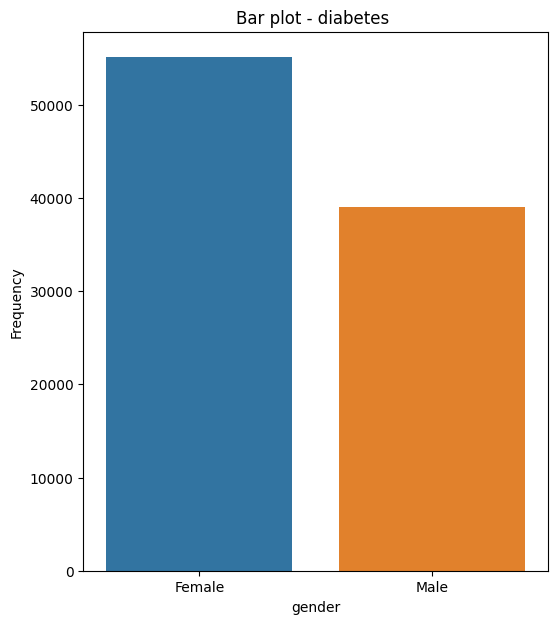

In [25]:
plt.figure(figsize=(6,7))
sns.countplot(data= df_clean , x= 'gender')
plt.xlabel('gender')
plt.ylabel('Frequency')
plt.title('Bar plot - diabetes ')
plt.show()

In [26]:
print(df_clean['gender'].value_counts())

gender
Female    55093
Male      39004
Name: count, dtype: Int64


- In this data, the number of Female is 55093 and Male are 39004

Text(0.5, 1.0, 'Bar Plot - smoking_history')

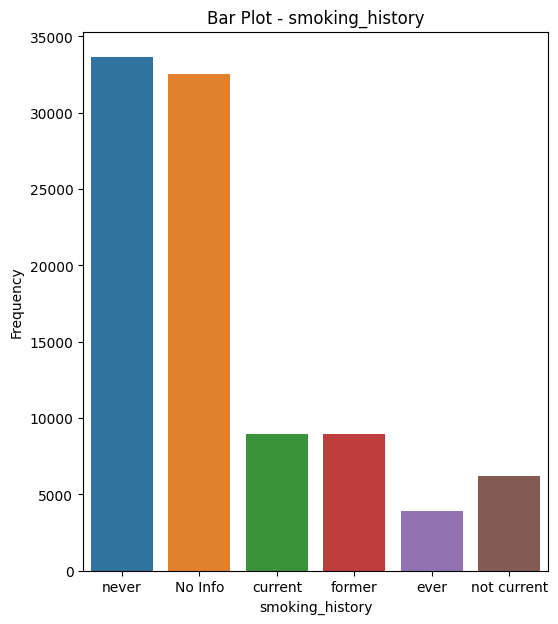

In [27]:
# Perform univariate analysis for smoking_history
plt.figure(figsize=(6, 7))
sns.countplot(data=df_clean, x="smoking_history")
plt.xlabel("smoking_history")
plt.ylabel("Frequency")
plt.title("Bar Plot - smoking_history")

In [28]:
# Define a function to map the existing categories to new ones
def recategorize_smoking(smoking_status):
    if smoking_status in ['never', 'No Info']:
        return 'non-smoker'
    elif smoking_status == 'current':
        return 'current'
    elif smoking_status in ['ever', 'former', 'not current']:
        return 'past_smoker'

# Apply the function to the 'smoking_history' column
df_clean['smoking_history'] = df_clean['smoking_history'].apply(recategorize_smoking)

# Check the new value counts
print(df_clean['smoking_history'].value_counts())

smoking_history
non-smoker     66148
past_smoker    19001
current         8948
Name: count, dtype: int64


/tmp/ipykernel_19/3212530590.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['smoking_history'] = df_clean['smoking_history'].apply(recategorize_smoking)


# Bivariate Analysis

In [29]:
string_col=df_clean.select_dtypes("string").columns.to_list()
string_col

['gender']

In [30]:
num_col=df_clean.columns.to_list()
#print(num_col)
for col in string_col:
    num_col.remove(col)
num_col.remove("diabetes")

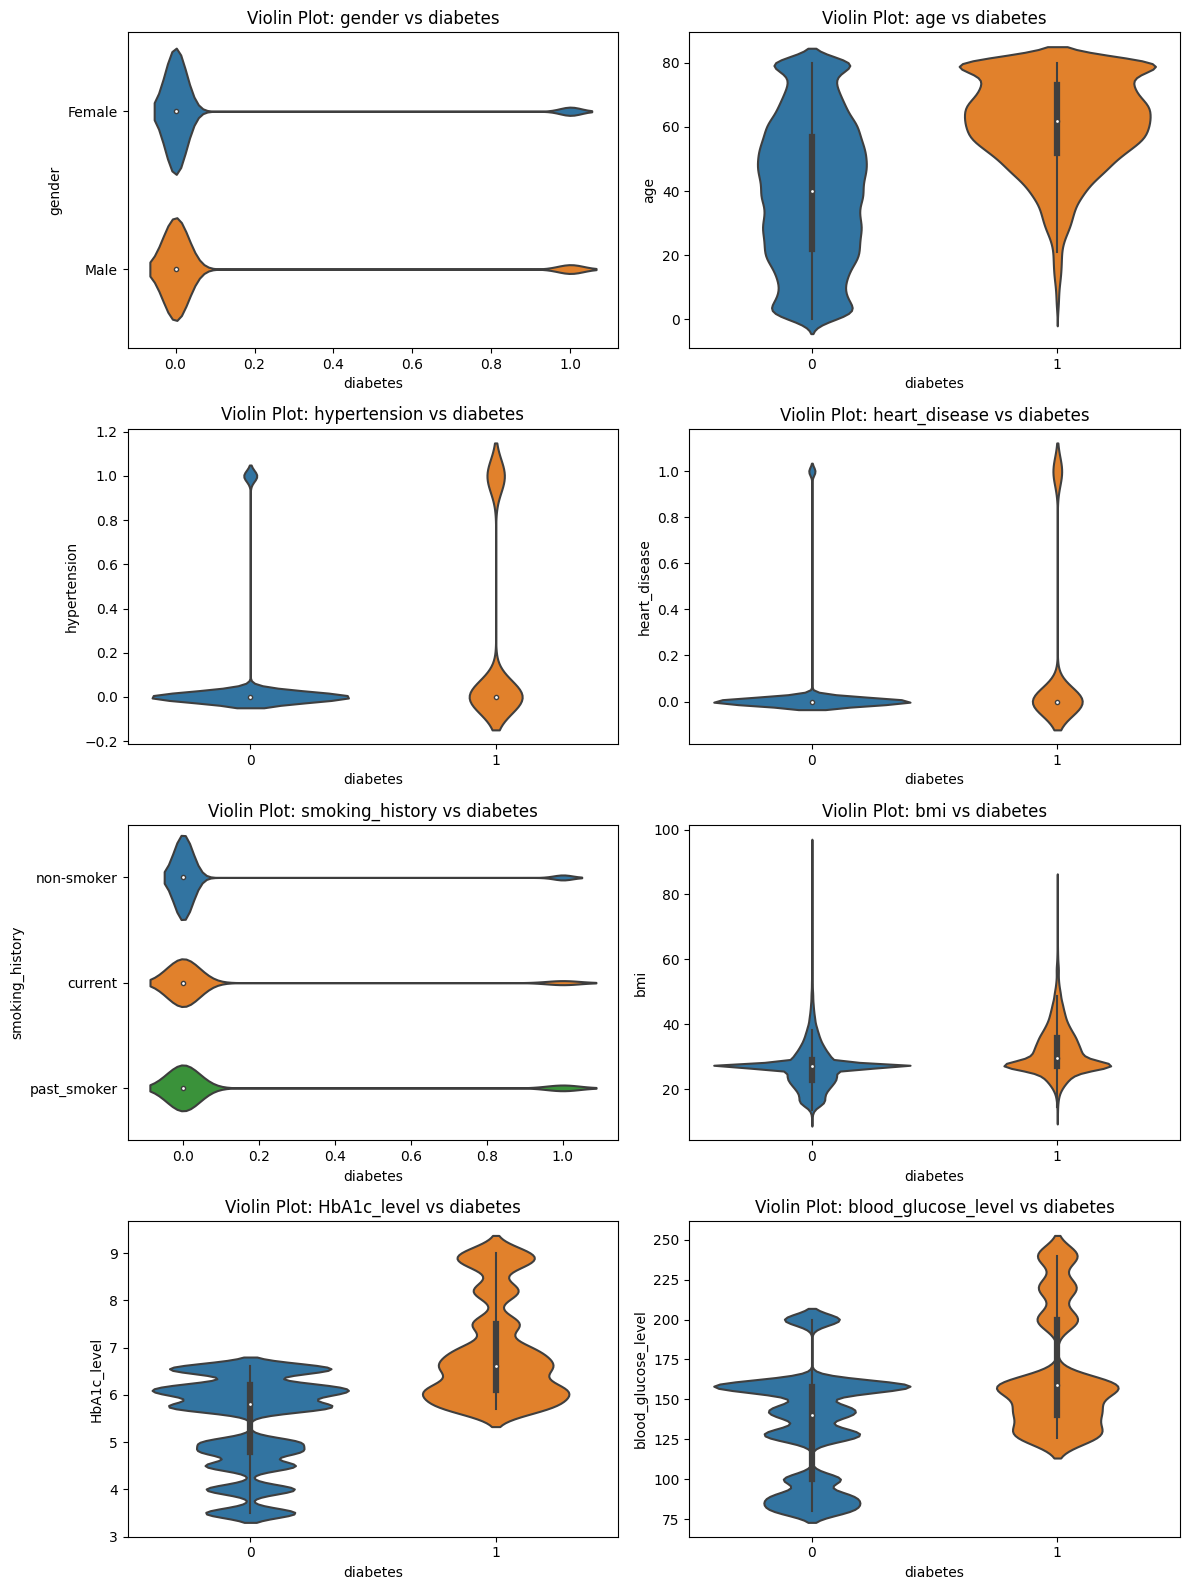

In [31]:
# Get the list of column names except for "diabetes"
variables = [col for col in df_clean.columns if col != "diabetes"]

# Define the grid layout based on the number of variables
num_variables = len(variables)
num_cols = 2  # Number of columns in the grid
num_rows = (num_variables + num_cols - 1) // num_cols  # Calculate the number of rows needed

# Set the size of the figure
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 4*num_rows))

# Generate violin plots for each variable with respect to HeartDisease
for i, variable in enumerate(variables):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row][col]
    
    sns.violinplot(data=df_clean, x="diabetes", y=variable, ax=ax)
    ax.set_xlabel("diabetes")
    ax.set_ylabel(variable)
    ax.set_title(f"Violin Plot: {variable} vs diabetes")
# Remove any empty subplots
if num_variables < num_rows * num_cols:
    for i in range(num_variables, num_rows * num_cols):
        fig.delaxes(axes.flatten()[i])

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

- As individuals get older, their risk of developing diabetes increases.
- Most of those affected are over 60 years old
- We have much more instances of no hypertension.
- We have much more instances of no heart disease.


In [32]:
df_clean

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,non-smoker,25.19,6.6,140,0
1,Female,54.0,0,0,non-smoker,27.32,6.6,80,0
2,Male,28.0,0,0,non-smoker,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,Female,36.0,0,0,non-smoker,24.60,4.8,145,0
99996,Female,2.0,0,0,non-smoker,17.37,6.5,100,0
99997,Male,66.0,0,0,past_smoker,27.83,5.7,155,0
99998,Female,24.0,0,0,non-smoker,35.42,4.0,100,0


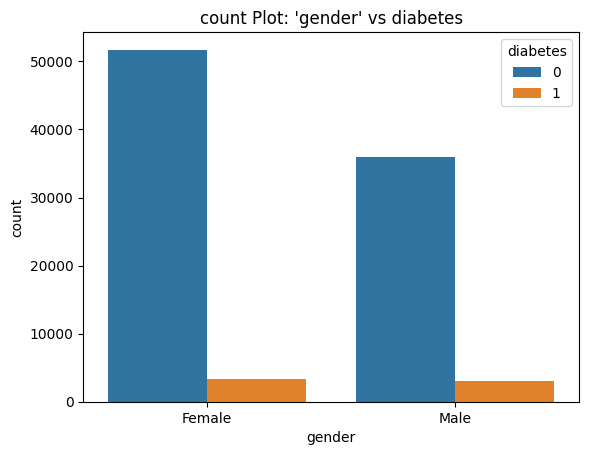

In [33]:
#count Plot fot gender with respect to diabetes
sns.countplot(data=df_clean, x='gender',hue ='diabetes')
plt.xlabel('gender')
plt.ylabel("count")
plt.title(f"count Plot: 'gender' vs diabetes")
plt.show()


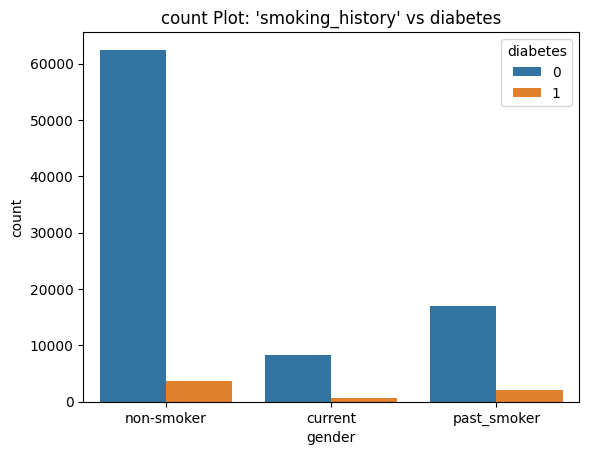

In [34]:
#count Plot fot smoking_history with respect to diabetes
sns.countplot(data=df_clean, x='smoking_history',hue ='diabetes')
plt.xlabel('gender')
plt.ylabel("count")
plt.title(f"count Plot: 'smoking_history' vs diabetes")
plt.show()

- The number of infected people is higher for smokers..This means that smoking has no effect on diabetes

# Feature Engineering (Data Pre-processing)

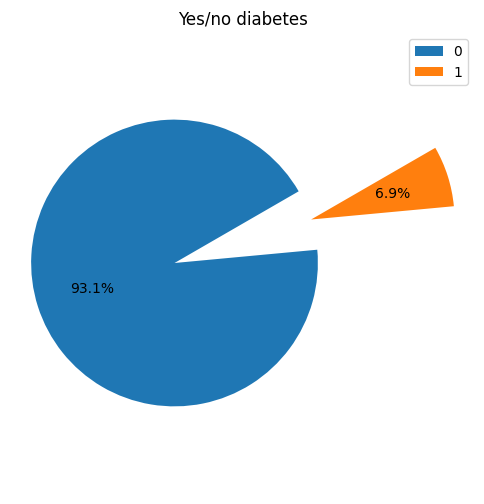

In [35]:
# check the balance of the target class
def balanced_plot(data):

    plt.figure(figsize=(6, 6))
    plt.pie(df_clean.diabetes.value_counts(), 
            df_clean.diabetes.value_counts().index, 
            autopct='%1.1f%%', 
            startangle=30)
    plt.axis('equal')
    plt.legend(df_clean.diabetes.value_counts().index, loc='best')
    plt.title('Yes/no diabetes')
    plt.show()
    
balanced_plot(df_clean)

- From the EDA ,the dataset is imbalanced (with 6.9% positive cases for diabetes and 93.1% negative cases), it's essential to balance the data to ensure that the model doesn't get biased towards the majority class. For this purpose, the Synthetic Minority Over-sampling Technique (SMOTE) is used, which generates synthetic samples for the minority class.

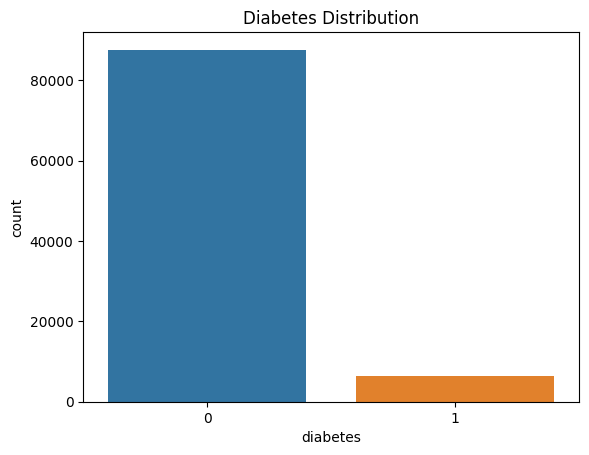

In [36]:
# Count plot for the 'diabetes' variable
sns.countplot(x='diabetes', data=df_clean)
plt.title('Diabetes Distribution')
plt.show()

In [37]:
# Load data and encode categorical features
df_encoded = pd.get_dummies(df_clean, columns=['gender', 'smoking_history'],dtype=int, drop_first=True)


In [38]:
# Spliting data
X = df_encoded.drop('diabetes', axis=1).values
y = df_encoded['diabetes'].values

In [39]:
# Define preprocessor for NumPy arrays
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), [0, 1, 2, 3, 4, 5]),  #  column indices
        ('cat', OneHotEncoder(drop='first'), [6, 7, 8])   #  column indices
    ])


# Model Selection and Evaluation

In [40]:
# Define models
models = {
    'LogisticRegression': LogisticRegression(random_state=42),
    'RandomForestClassifier': RandomForestClassifier(random_state=42),
    'SVC': SVC(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'XGBClassifier': XGBClassifier(use_label_encoder=False, eval_metric="error", objective="binary:logistic")
}

# KFold cross-validation for evaluation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Dictionary to store results across folds
results = defaultdict(lambda: defaultdict(list))


In [41]:
# Function to plot confusion matrix
def plot_confusion_matrix(conf_matrix, model_name, fold):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['No Diabetes', 'Diabetes'],
                yticklabels=['No Diabetes', 'Diabetes'])
    plt.title(f"Confusion Matrix for {model_name} (Fold {fold})")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Function to apply SMOTE and RandomUnderSampler
def apply_resampling(X_train, y_train):
    # Apply SMOTE to the training data
    smote = SMOTE(sampling_strategy=0.1)  # Adjust sampling strategy as needed
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # Apply RandomUnderSampler to the resampled data
    under_sampler = RandomUnderSampler(sampling_strategy=0.5)  # Adjust sampling strategy as needed
    X_train_resampled, y_train_resampled = under_sampler.fit_resample(X_train_resampled, y_train_resampled)

    return X_train_resampled, y_train_resampled



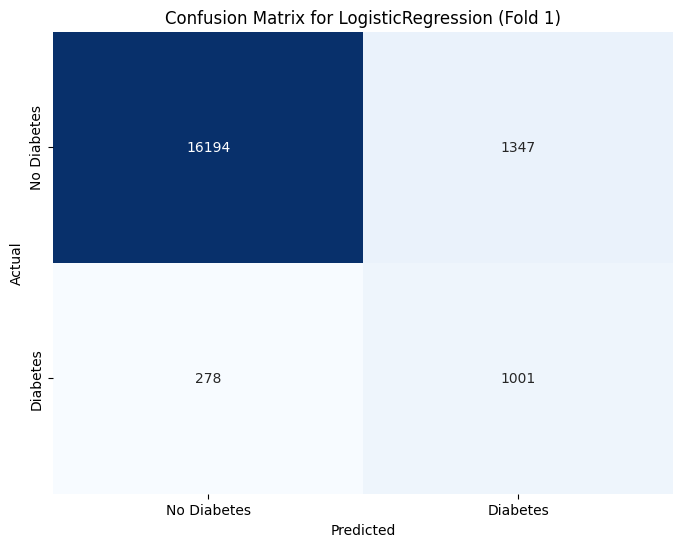

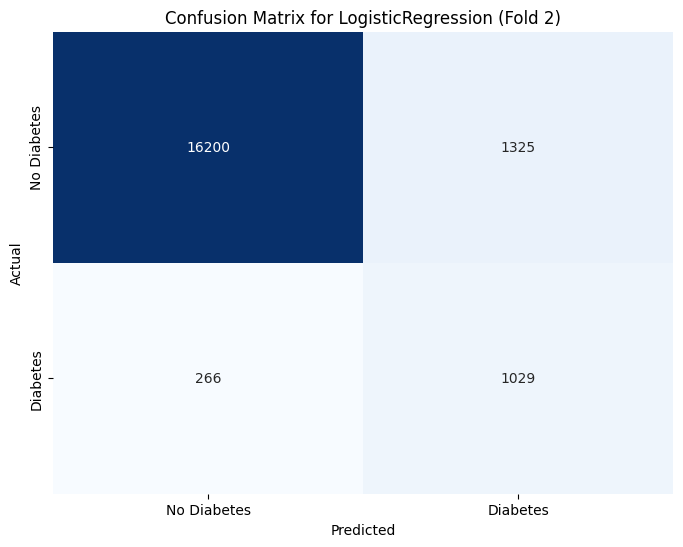

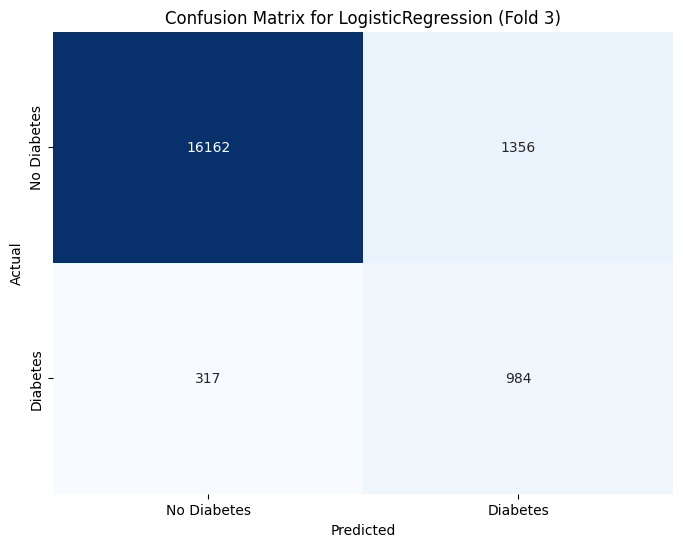

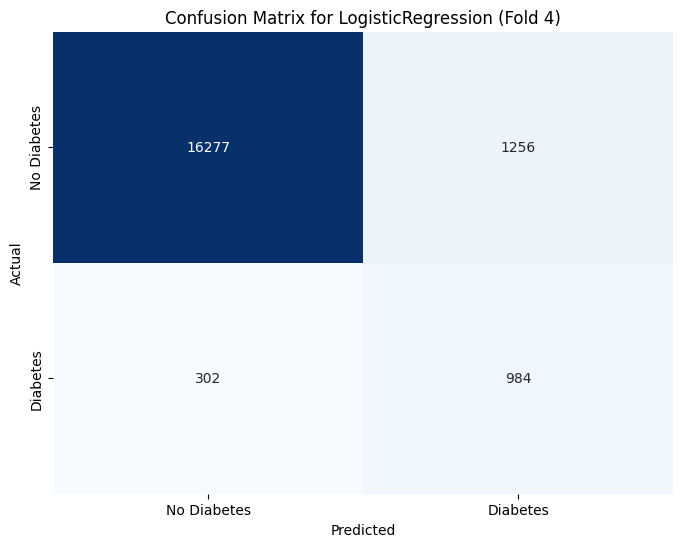

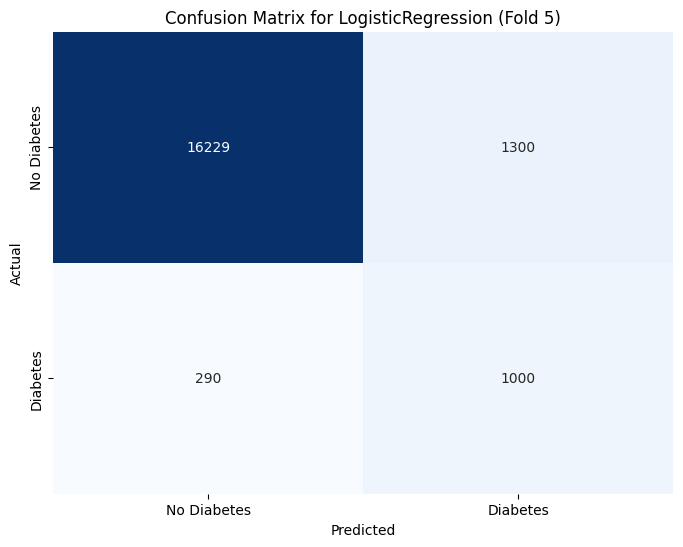

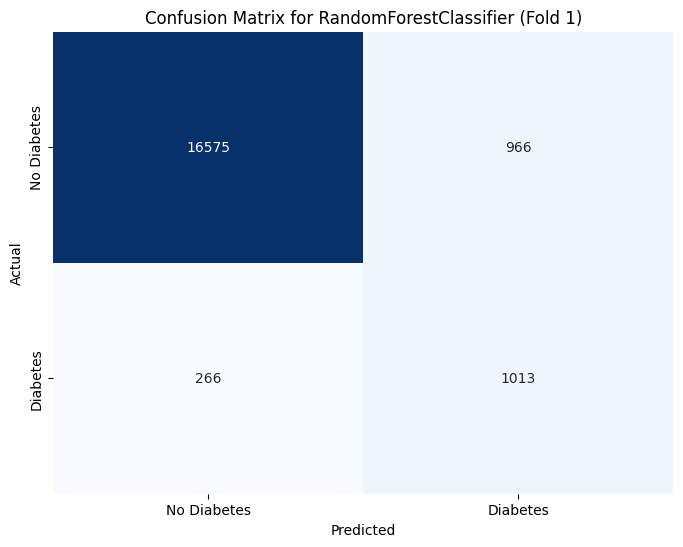

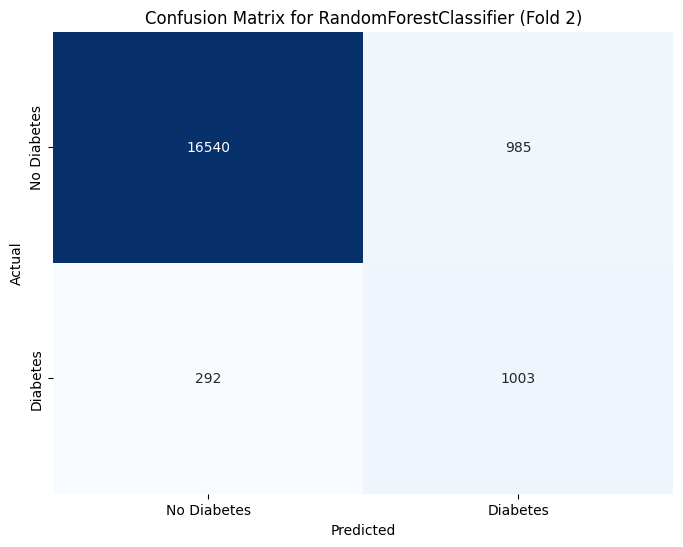

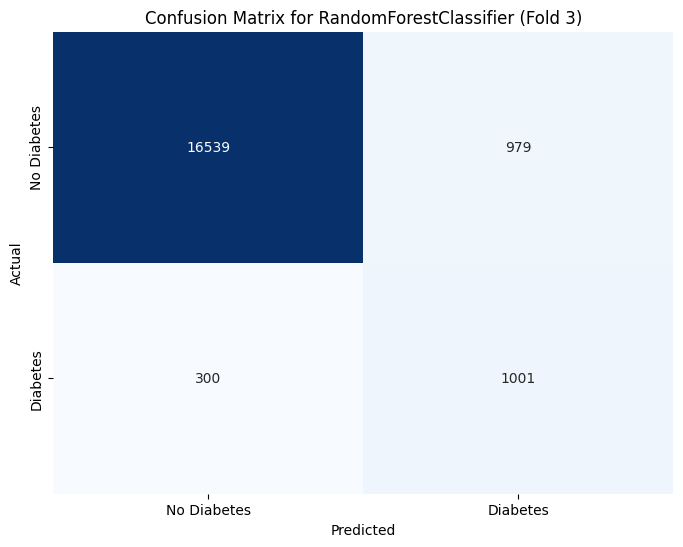

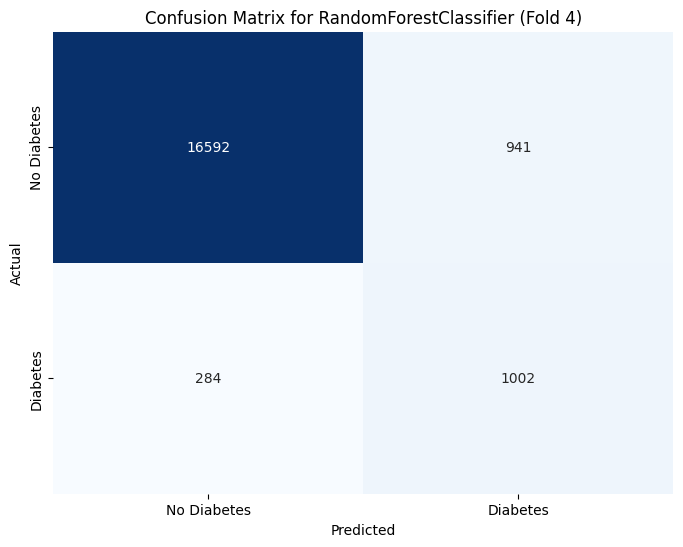

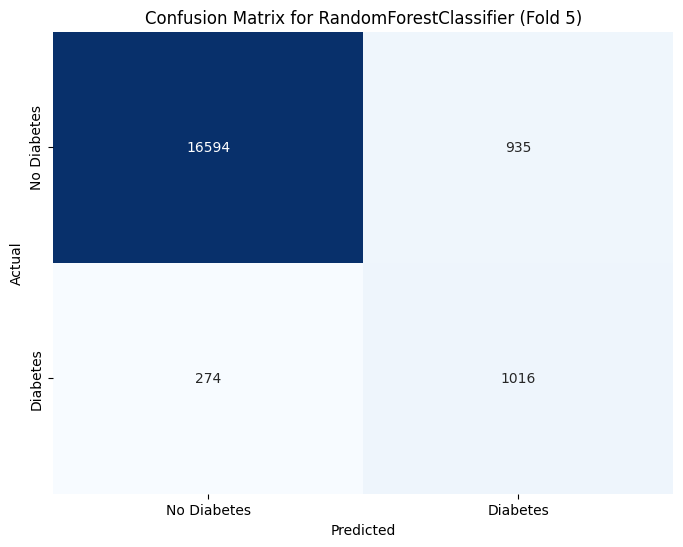

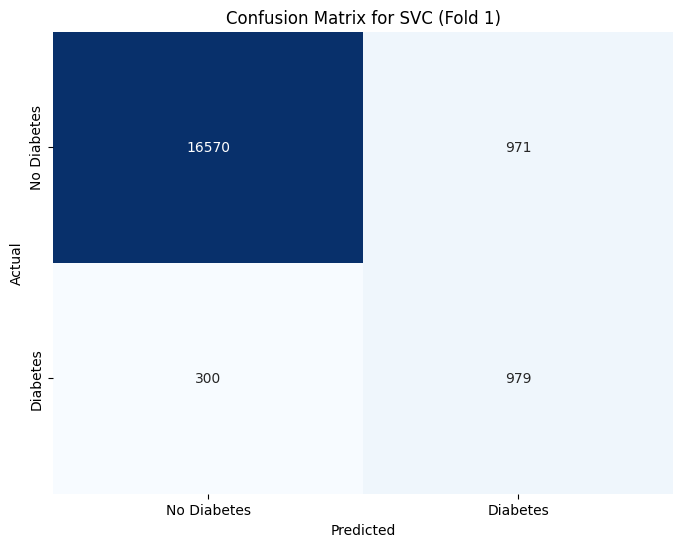

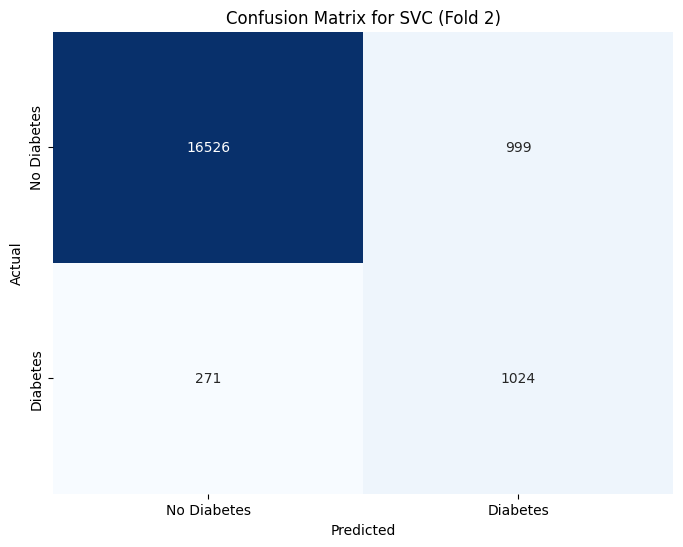

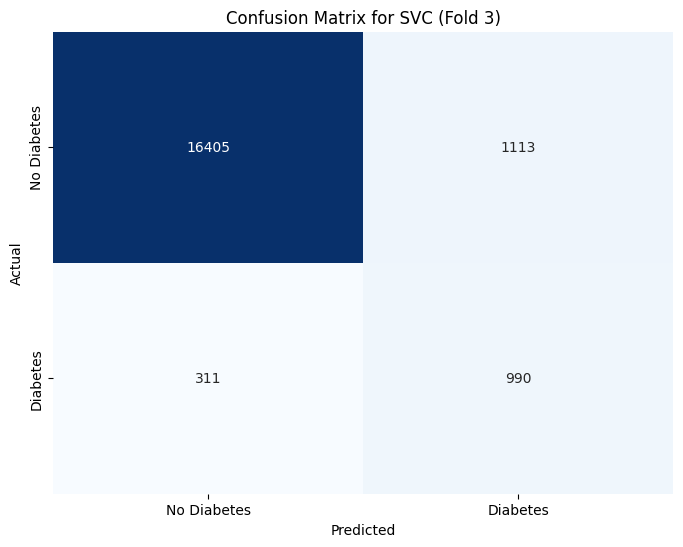

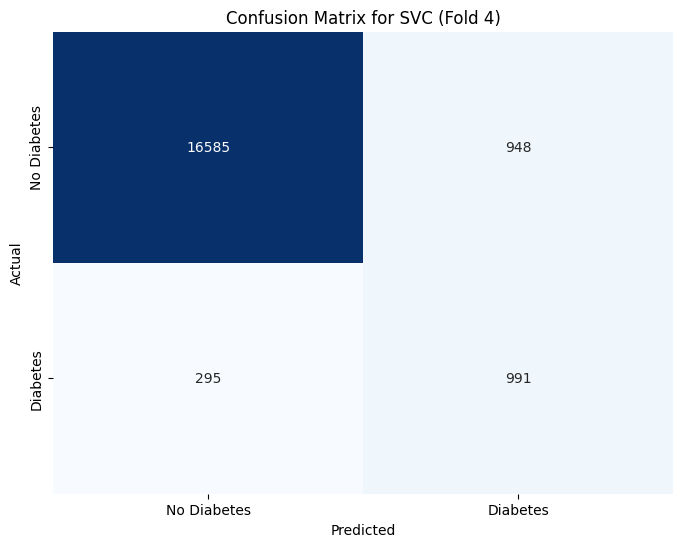

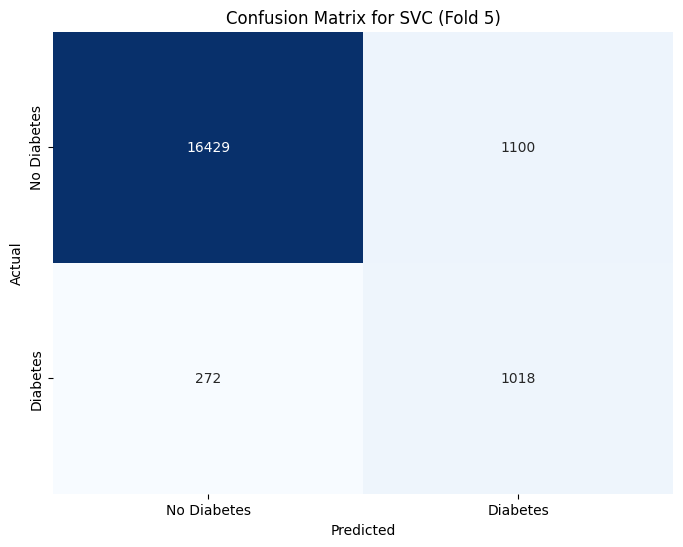

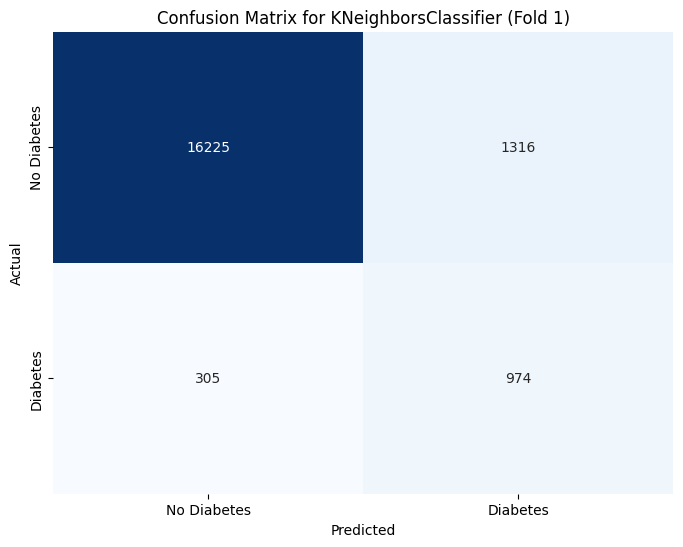

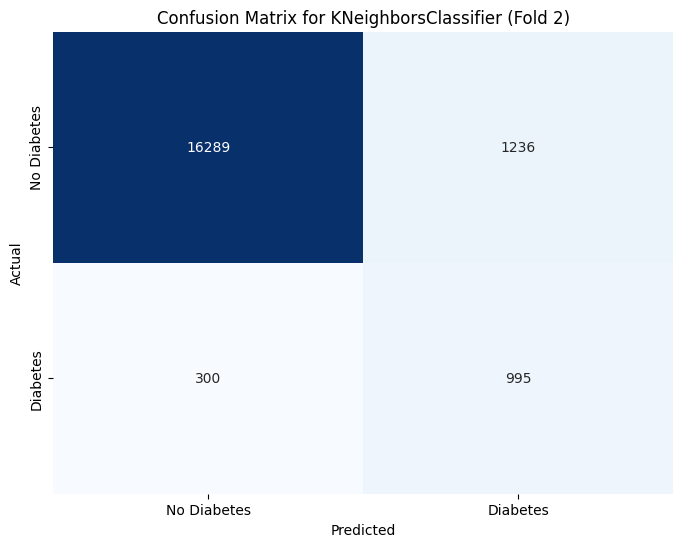

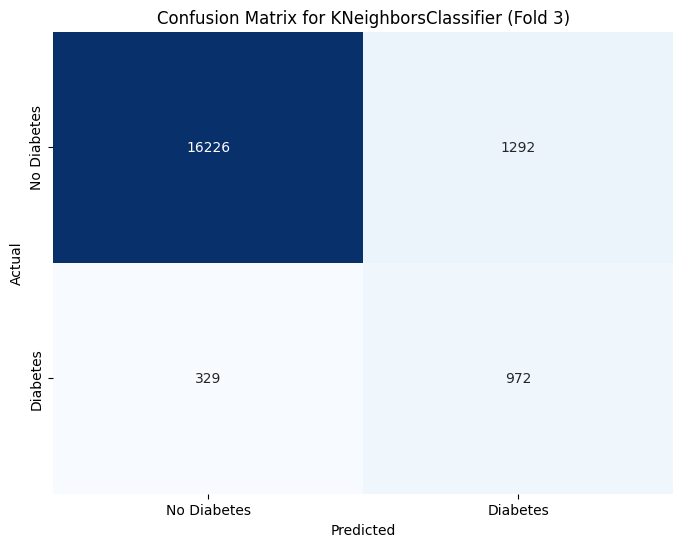

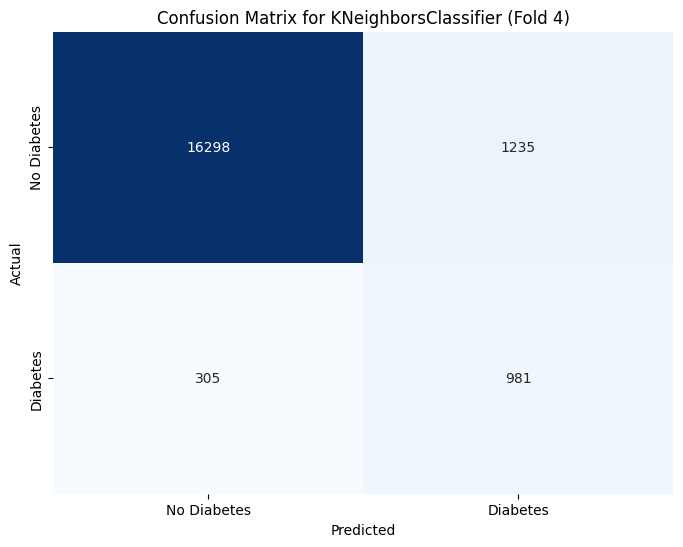

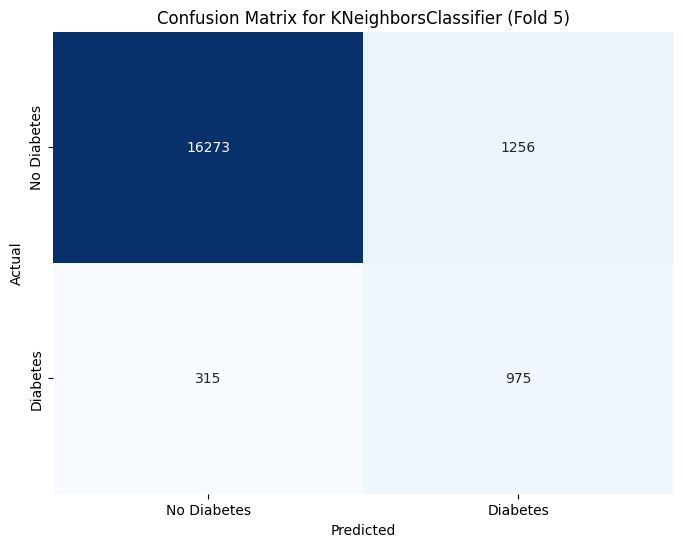

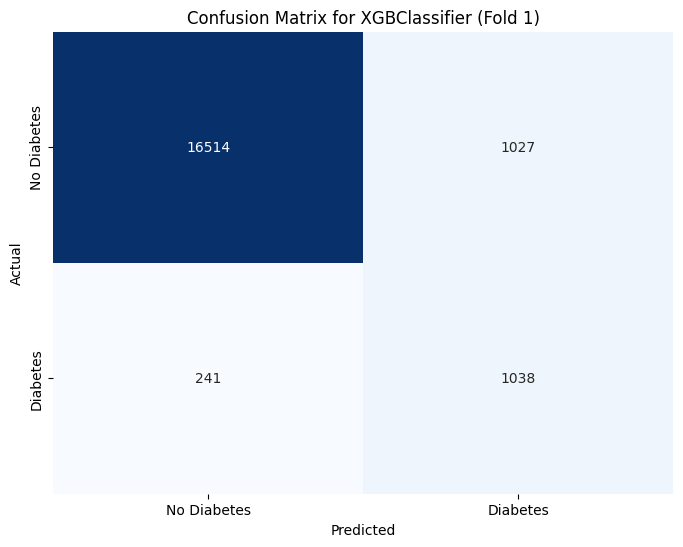

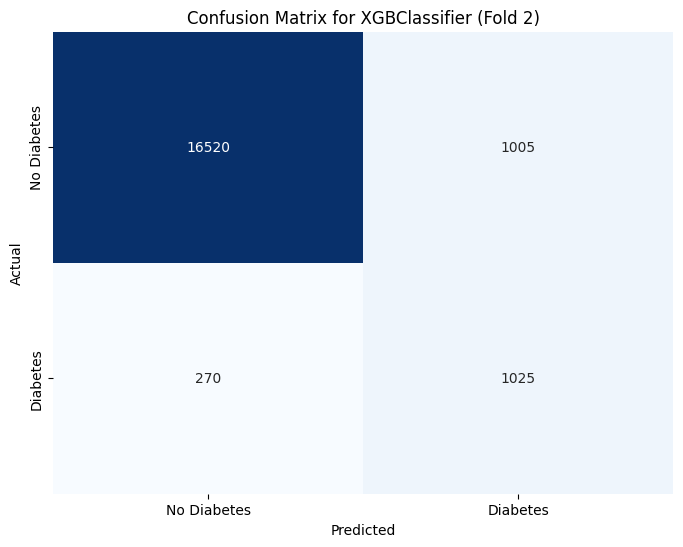

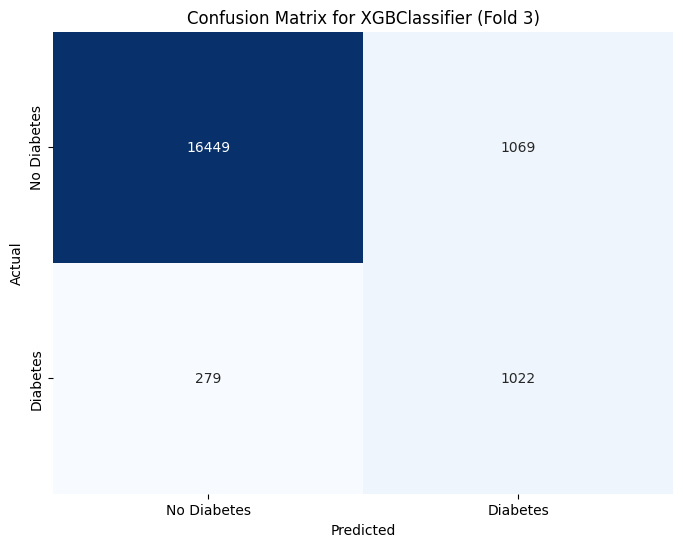

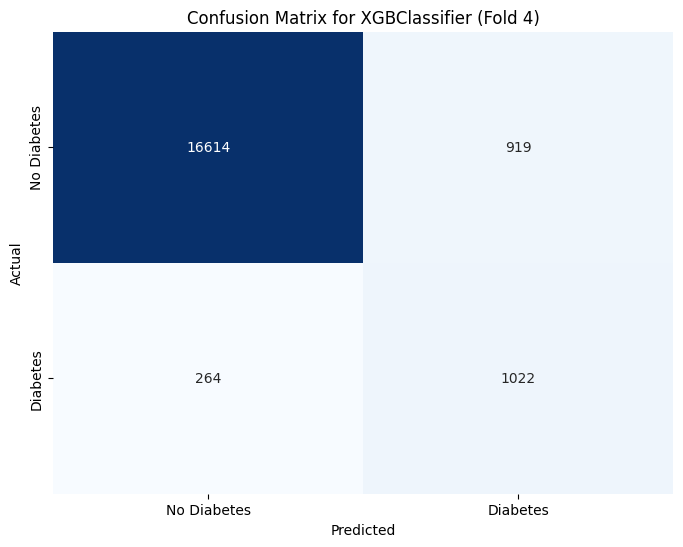

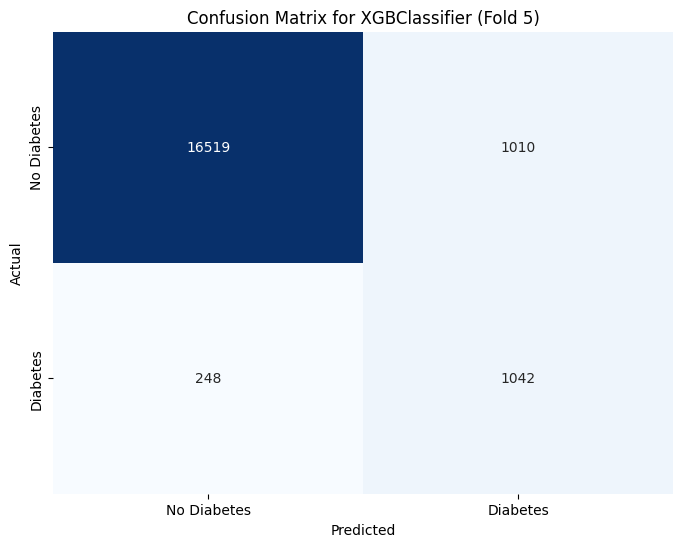

In [42]:
# Iterate through models and perform cross-validation
for model_name, model in models.items():
    for fold, (train_index, test_index) in enumerate(cv.split(X), 1):
        # Split data into train and test sets
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Apply SMOTE and RandomUnderSampler to the training data
        X_train_resampled, y_train_resampled = apply_resampling(X_train, y_train)

        # Define pipeline steps
        pipe_steps = [
            ('preprocessor', preprocessor),
            ('classifier', model)
        ]

        # Create the pipeline
        pipeline = Pipeline(steps=pipe_steps)

        # Fit the pipeline on the resampled training data
        pipeline.fit(X_train_resampled, y_train_resampled)
        # Evaluate the pipeline on the test data
        y_pred = pipeline.predict(X_test)

        # Store metrics for each fold
        results[model_name]['accuracy'].append(accuracy_score(y_test, y_pred))
        results[model_name]['precision'].append(precision_score(y_test, y_pred))
        results[model_name]['recall'].append(recall_score(y_test, y_pred))
        results[model_name]['f1'].append(f1_score(y_test, y_pred))
        
        # Print confusion matrix for each fold
        cm = confusion_matrix(y_test, y_pred)
        plot_confusion_matrix(cm, model_name, fold)

In [43]:
# Print the mean scores and choose the best model
best_model = None
best_mean_accuracy = 0

for model_name, metrics in results.items():
    mean_accuracy = np.mean(metrics['accuracy'])
    mean_precision = np.mean(metrics['precision'])
    mean_recall = np.mean(metrics['recall'])
    mean_f1 = np.mean(metrics['f1'])

print(f"\nModel: {model_name}")
print(f"Mean Accuracy: {mean_accuracy:.4f}")
print(f"Mean Precision: {mean_precision:.4f}")
print(f"Mean Recall: {mean_recall:.4f}")
print(f"Mean F1-score: {mean_f1:.4f}")

# Choose the best model based on mean accuracy
if mean_accuracy > best_mean_accuracy:
    best_model = model_name
    best_mean_accuracy = mean_accuracy

print(f"\nBest Model: {best_model} with Mean Accuracy: {best_mean_accuracy:.4f}")



Model: XGBClassifier
Mean Accuracy: 0.9327
Mean Precision: 0.5061
Mean Recall: 0.7982
Mean F1-score: 0.6194

Best Model: XGBClassifier with Mean Accuracy: 0.9327


# Hyperparameter Tuning

In [44]:
# Parameters for XGBClassifier
param_dist = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__max_depth': [3, 4, 5],
    'classifier__min_child_weight': [1, 2, 3],
    'classifier__subsample': [0.8, 0.9, 1.0],
    'classifier__colsample_bytree': [0.8, 0.9, 1.0],
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_dist,
    n_iter=50,  
    scoring='accuracy',
    cv=cv,
    n_jobs=-1,
    verbose=1
)

# Fit the randomized search to the data
random_search.fit(X, y)

# Display the best parameters and the corresponding mean cross-validated score
print(f"\nBest Parameters for {best_model}: {random_search.best_params_}")
print(f"Best Mean Accuracy for {best_model}: {random_search.best_score_:.4f}")


Fitting 5 folds for each of 50 candidates, totalling 250 fits

Best Parameters for XGBClassifier: {'classifier__subsample': 1.0, 'classifier__n_estimators': 100, 'classifier__min_child_weight': 1, 'classifier__max_depth': 4, 'classifier__learning_rate': 0.1, 'classifier__colsample_bytree': 0.8}
Best Mean Accuracy for XGBClassifier: 0.9704


In [45]:
# Set the best hyperparameters
best_params = {
    'classifier__subsample': 0.8,
    'classifier__n_estimators': 200,
    'classifier__min_child_weight': 3,
    'classifier__max_depth': 3,
    'classifier__learning_rate': 0.1,
    'classifier__colsample_bytree': 1.0
}

# Update the pipeline with the best hyperparameters
pipeline.set_params(**best_params)

# Train the final model on the entire training dataset
pipeline.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  [0, 1, 2, 3, 4, 5]),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  [6, 7, 8])])),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=1.0, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=Fals...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None, min_child_weight=3,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=200,
                               n_jobs=None, num_parallel_tree=None,
                               random_state=None, ...))])

In [46]:
y_pred_test = pipeline.predict(X_test)

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test)
test_recall = recall_score(y_test, y_pred_test)
test_f1 = f1_score(y_test, y_pred_test)

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test F1-score: {test_f1:.4f}")


Test Accuracy: 0.9713
Test Precision: 0.9832
Test Recall: 0.5907
Test F1-score: 0.7380


In [47]:
# Save the trained model using joblib
joblib.dump(pipeline, 'Diabetes_model.joblib')


['Diabetes_model.joblib']

In [48]:
# Load the saved model
loaded_model = joblib.load('Diabetes_model.joblib')

In [49]:
loaded_model.n_features_in_

9

In [50]:
df_encoded.columns

Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes', 'gender_Male',
       'smoking_history_non-smoker', 'smoking_history_past_smoker'],
      dtype='object')

In [51]:
# Create a NumPy array for the new data point
new_data_point = np.array([[80.0, 0, 1, 25.19, 6.6, 140, 1, 0, 1]])

# Make predictions using the loaded model
prediction = loaded_model.predict(new_data_point)

# Display the prediction
print("Prediction:", prediction)


Prediction: [0]


# Done